In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
%run plotting.py

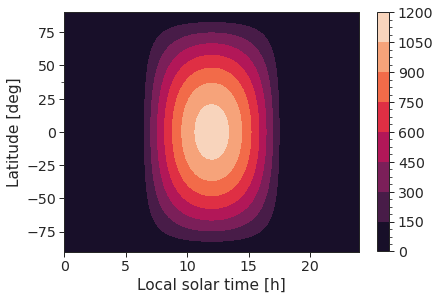

In [26]:
def plot_thermal_lemoine():
    # Recreate Fig. 5 from Lemoine 2013
    def exitance(polar, azimuth):
        subsolar = np.array([1, 0, 0])
        normal = np.array([
            np.cos(azimuth) * np.sin(polar),
            np.sin(azimuth) * np.sin(polar),
            np.cos(polar)
        ])
        cosphi = max(subsolar @ normal, 0)
        
        sigma = 5.67e-8
        T = max(375 * cosphi**(1/4), 100)
        return sigma * T**4
        
    polarlist = np.linspace(0, 1, 100) * np.pi
    azimuthlist = np.linspace(-1, 1, 100) * np.pi
    polars, azimuths = np.meshgrid(polarlist, azimuthlist)
    
    exitances = np.vectorize(exitance)(polars, azimuths)
    plt.contourf((azimuths / np.pi + 1) * 12, 90 - np.degrees(polars), exitances)
    plt.colorbar()
    plt.xlabel("Local solar time [h]")
    plt.ylabel("Latitude [deg]")
    
    format_plot()
    
plot_thermal_lemoine()